In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy

In [99]:
data = []
record = {}

with open("acm.txt","r") as file:
    for line in file:
        line = line.strip()
        if line.startswith("#*"):
            record["title"] = line[2:].strip()
        elif line.startswith("#@"):
            record["authors"] = [author.strip() for author in line[2:].split(",")]
        elif line.startswith("#t"):
            record["year"] = line[2:].strip()
        elif line.startswith("#c"):
            record["venue"] = line[2:].strip()
        elif line.startswith("#%"):
            record.setdefault("references",[]).append(line[2:].strip())
        elif line.startswith("#!"):
            record["abstract"] = line[2:].strip()
        elif line.startswith("#index"):
            record["id"] = line[6:].strip()
        elif not line:
            if record:
                data.append(record)
                record = {}


df = pd.DataFrame(data)
df.head()



,year,venue,id,title,authors,references,abstract
0,1984,"Integration, the VLSI Journal",1,NaN,NaN,NaN,NaN
1,1984,International Journal of Parallel Programming,2,The verification of the protection mechanisms ...,[Virgil D. Gligor],NaN,NaN
2,1984,International Journal of Parallel Programming,3,Another view of functional and multivalued dep...,"[M. Gyssens, J. Paredaens]",NaN,NaN
3,1984,International Journal of Parallel Programming,4,Entity-relationship diagrams which are in BCNF,"[Sushil Jajodia, Peter A. Ng, Frederick N. Spr...",NaN,NaN
4,1984,The computer comes of age,5,The computer comes of age,[Rene Moreau],NaN,NaN


### A. Compute the number of distinct authors, publication venues, publications, and citations/references

In [100]:
df['id'] = df['id'].astype(int)

In [101]:
# Replace NaN with empty lists 
df["authors"] = df["authors"].apply(lambda x : x if isinstance(x,list) else [])
df["references"] = df["references"].apply(lambda x : x if isinstance(x,list) else [])
df["venue"] = df["venue"].fillna("Unknown")
df["title"] = df["title"].fillna("Unknown")

unique_authors = set(author for authors in df["authors"] for author in authors)
unique_references = set(reference for references in df["references"] for reference in references)
unique_venues = df["venue"].nunique()
unique_publications = df["title"].nunique()
unique_years = df["year"].nunique()

print("Number of unique venues : ", unique_venues)
print("Number of unique authors : ", len(unique_authors)) 
print("Number of unique references : ", len(unique_references))
print("Number of unique publications : ", unique_publications)
print("Number of unique years : ", unique_years)

Number of unique venues :  273330
Number of unique authors :  1651589
Number of unique references :  1007495
Number of unique publications :  2183551
Number of unique years :  73


### B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?

In [102]:
conference = "Principles and Practice of Knowledge Discovery in Databases"

match = df[df["venue"].str.contains(conference,case = False,na = False)]

unique_match = match["venue"].unique()

for venue in unique_match:
    print(venue)

print("Total non unique : ", len(match))


PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)
Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases
Total non unique :  212


#### Summary : Inconsistency in Data

- The PKDD conference naming convention is different for each of rows

### C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

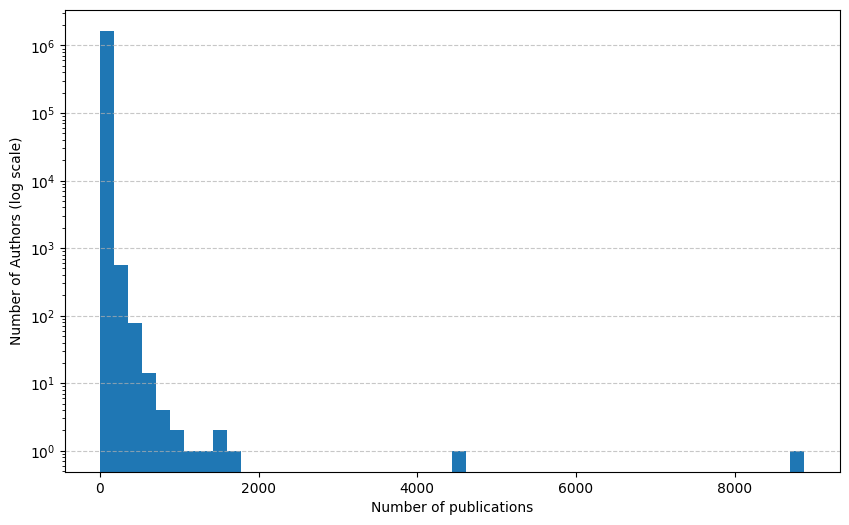

In [103]:
author_pub_count = defaultdict(int)
for authors in df["authors"]:
    for author in authors:
        author_pub_count[author] += 1

frequency = list(author_pub_count.values())


plt.figure(figsize=(10,6))
plt.hist(frequency,bins = 50,log = True)
plt.xlabel("Number of publications")
plt.ylabel("Number of Authors (log scale)")
plt.grid(axis = 'y', linestyle = '--',alpha = 0.7)
plt.show()

### D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [104]:
avg_publications = np.mean(frequency)
std_publications = np.std(frequency)

q1 = np.percentile(frequency,25)
q2 = np.median(frequency)
q3 = np.percentile(frequency,75)

print("Mean is : ",avg_publications)
print("Median is : ", q2)
print("Standard Deviation is : ",std_publications)
print("Q1 : ", q1)
print("Q3 : ", q3)

Mean is :  3.4626320470770877
Median is :  1.0
Standard Deviation is :  12.772650815334567
Q1 :  1.0
Q3 :  3.0


#### Summary of Findings :

- Since the mean > median indicates that there are outliers i.e. the authors with higher number of publications pulling the average towards itself. Since median = 1.0, majority of authors have only small publications.

- Since the SD is higher it indicates there is a lot of variability in the data because of the outliers.

- Since Q1 = 1 and Q3 = 3, means that majority ( 50 % ) of authors have only small publications.

### E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

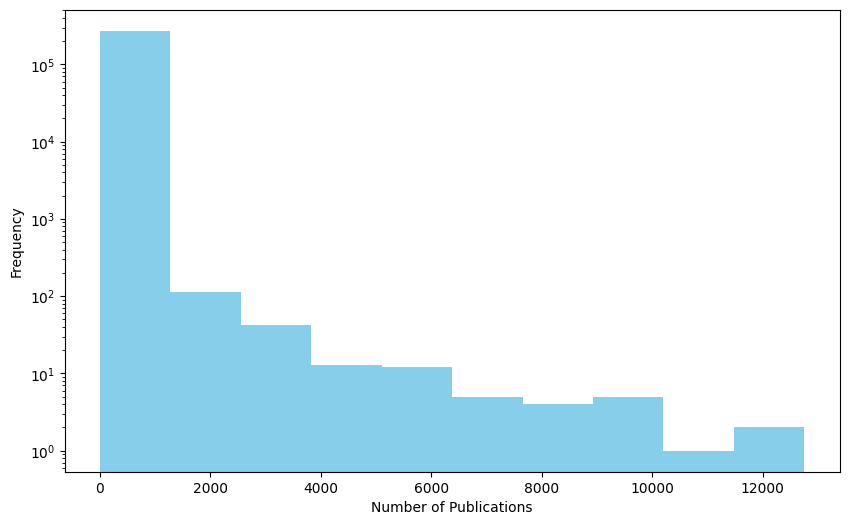

In [105]:
venue_counts = df["venue"].value_counts()

plt.figure(figsize=(10,6))
plt.hist(venue_counts,color='skyblue')
plt.yscale('log')
plt.xlabel("Number of Publications")
plt.ylabel("Frequency")

plt.show()


In [106]:
mean = venue_counts.mean()
std_dev = venue_counts.std()
median = venue_counts.median()
q1 = np.percentile(venue_counts, 25)
q3 = np.percentile(venue_counts, 75)

# Venue with the most publications
most_publications_venue = venue_counts.idxmax()
most_publications_count = venue_counts.max()

# Output results
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Median: {median}")
print(f"Q1 (1st Quartile): {q1}")
print(f"Q3 (3rd Quartile): {q3}")
print(f"Venue with the most publications: {most_publications_venue} ({most_publications_count} publications)")


Mean: 8.725957633629678
Standard Deviation: 106.79612093154451
Median: 1.0
Q1 (1st Quartile): 1.0
Q3 (3rd Quartile): 1.0
Venue with the most publications: IEEE Transactions on Information Theory (12754 publications)


### F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

Publication with maximum references :  Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles 809


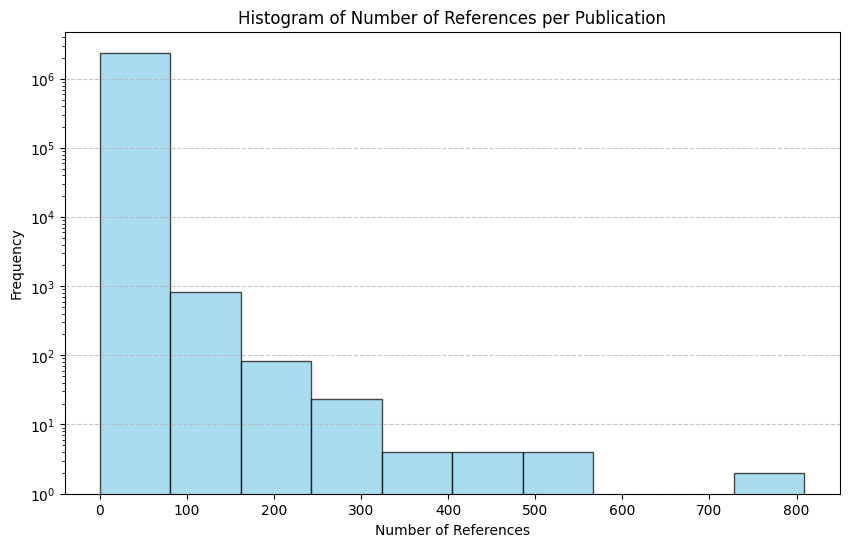

In [107]:
df["num_references"] = df["references"].apply(lambda x : len(x) if isinstance(x,list) else 0)

max_references = df['num_references'].max()
publication_with_max_references = df[df['num_references'] == max_references]['title'].iloc[0]
print("Publication with maximum references : ", publication_with_max_references, max_references)

plt.figure(figsize=(10, 6))
plt.hist(df['num_references'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Number of References per Publication')
plt.xlabel('Number of References')
plt.ylabel('Frequency')
plt.yscale('log') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Pivot Down all the references for citation calculations

temp_df = df.explode("references")
temp_df = temp_df[temp_df["references"].notna()]

citation_counts = temp_df["references"].value_counts().to_dict()

df["id"] = df["id"].astype(str)
df["citation_count"] = df["id"].map(citation_counts).fillna(0).astype(int)


938039
         year                         venue       id  \
2134999  2014  INFORMS Journal on Computing  2135000   

                                title authors references abstract  \
2134999  INFORMS Journal on Computing      []  [2381731]      NaN   

         num_references  citation_count  
2134999               1          938039  


In [136]:
max_citation_count = df["citation_count"].max()

max_citation_row = df[df["citation_count"] == max_citation_count]

max_citation_row.head()

,year,venue,id,title,authors,references,abstract,num_references,citation_count
2134999,2014,INFORMS Journal on Computing,2135000,INFORMS Journal on Computing,[],[2381731],NaN,1,938039


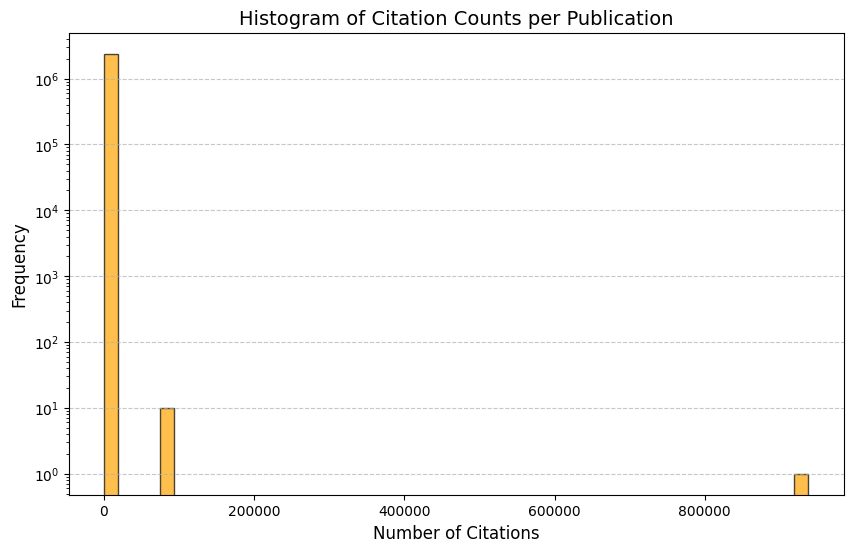

In [138]:
plt.figure(figsize=(10, 6))
plt.hist(df['citation_count'], bins=50, color='orange', edgecolor='black', alpha=0.7)

plt.title('Histogram of Citation Counts per Publication', fontsize=14)
plt.xlabel('Number of Citations', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

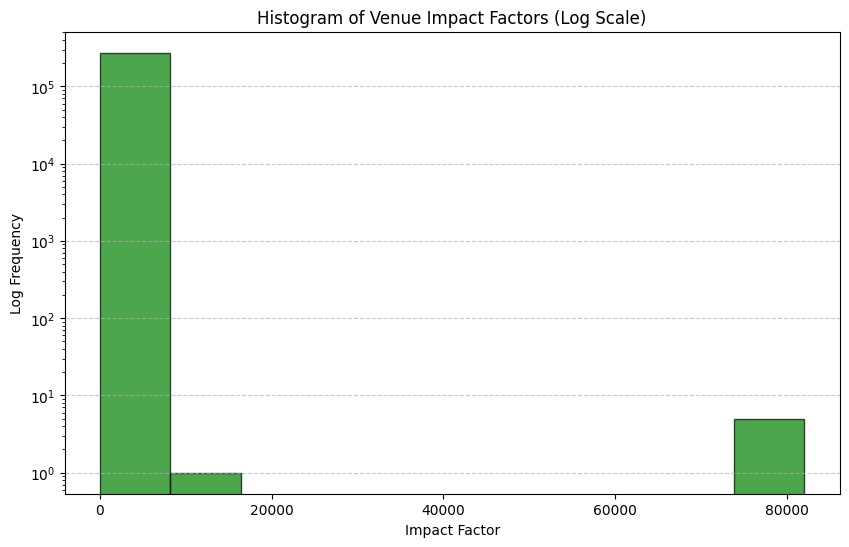

Highest Impact Factor: 82080.00

Venues with the highest impact factor:
venue
AI EDAM                                                            82080.0
Graphics Interface 1990                                            82080.0
Graz                                                               82080.0
IJIRR: International Journal of Information Retrieval Research.    82080.0
PVLDB                                                              82080.0
dtype: float64


In [144]:
import matplotlib.pyplot as plt

venue_total_citations = df.groupby('venue')['citation_count'].sum()
venue_publication_counts = df['venue'].value_counts()
impact_factor = venue_total_citations / venue_publication_counts
impact_factor = impact_factor.fillna(0)

plt.figure(figsize=(10, 6))
plt.hist(impact_factor,color='green', edgecolor='black', alpha=0.7)
plt.yscale('log')
plt.title('Histogram of Venue Impact Factors (Log Scale)')
plt.xlabel('Impact Factor')
plt.ylabel('Log Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

highest_impact_factor = impact_factor.max()
highest_impact_factor_venues = impact_factor[impact_factor == highest_impact_factor]

print(f"Highest Impact Factor: {highest_impact_factor:.2f}")
print("\nVenues with the highest impact factor:")
print(highest_impact_factor_venues)



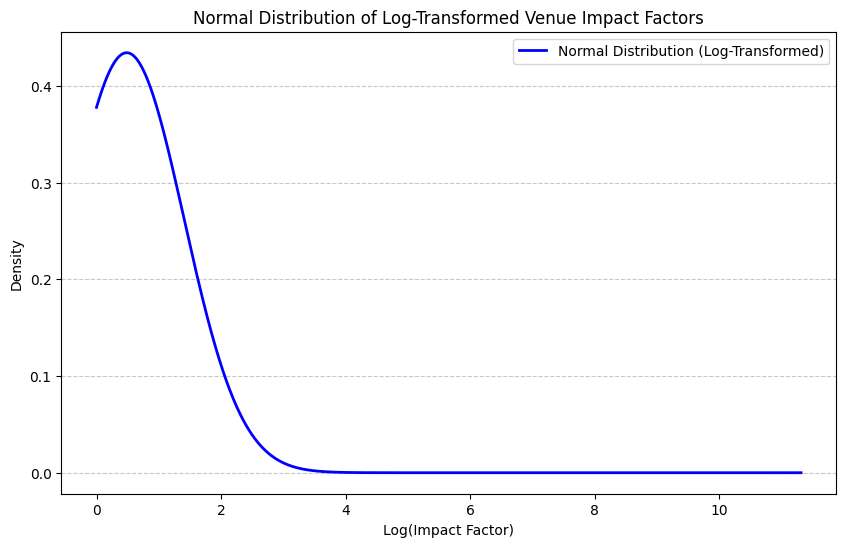

In [151]:
log_impact_factor = np.log1p(impact_factor)

mean = log_impact_factor.mean()
std = log_impact_factor.std()

x = np.linspace(log_impact_factor.min(), log_impact_factor.max(), 1000)
pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', linewidth=2, label='Normal Distribution (Log-Transformed)')
plt.title('Normal Distribution of Log-Transformed Venue Impact Factors')
plt.xlabel('Log(Impact Factor)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

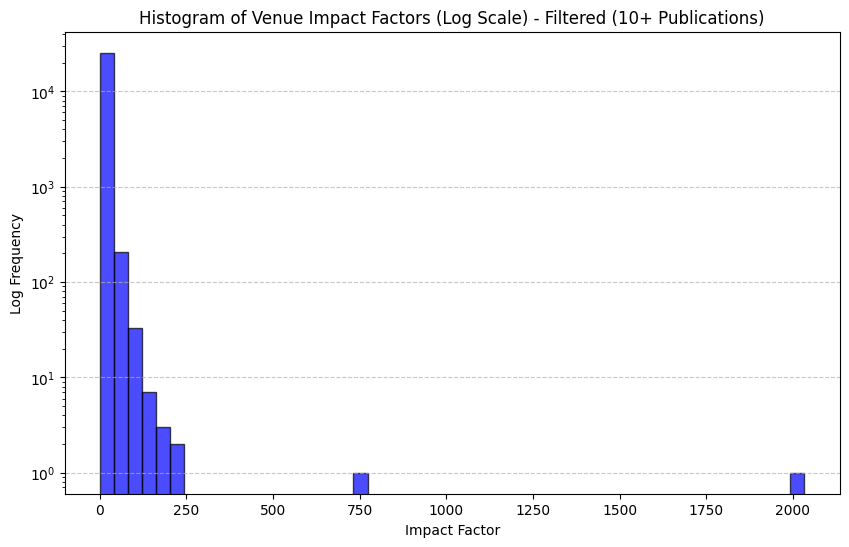

Highest Impact Factor (Filtered): 2033.20

Venues with the highest impact factor:
venue
Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining    2033.20297
dtype: float64

Citation counts for publications in 'Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining':
[    9     3     1     0     0    10     0     2     0     1     0     0
     0     5     0     1     1     2     3     3     1     3     1     1
     2     1     0     1     0     3     0     2     8     1     3     0
     0     0     1     1     1     4     0     5     1     0     0     5
     4     3     0     1     0     1     1     7     1     1     1     0
     3     0     2     6     2     2     2     4     5     5     2     0
     9     1     3     2     0     1     3     0     1     3     1     2
     0     0     0     2     1     0     1     0     6     0     3     1
     1    15     1     1     2     3     4     2     4     3 

In [ ]:
import matplotlib.pyplot as plt

venue_total_citations = df.groupby('venue')['citation_count'].sum()
venue_publication_counts = df['venue'].value_counts()

filtered_venues = venue_publication_counts[venue_publication_counts >= 10].index
filtered_venue_citations = venue_total_citations[filtered_venues]
filtered_venue_publication_counts = venue_publication_counts[filtered_venues]

filtered_impact_factor = filtered_venue_citations / filtered_venue_publication_counts
filtered_impact_factor = filtered_impact_factor.fillna(0)

plt.figure(figsize=(10, 6))
plt.hist(filtered_impact_factor, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.yscale('log')
plt.title('Histogram of Venue Impact Factors (Log Scale) - Filtered (10+ Publications)')
plt.xlabel('Impact Factor')
plt.ylabel('Log Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

highest_impact_factor = filtered_impact_factor.max()
highest_impact_factor_venues = filtered_impact_factor[filtered_impact_factor == highest_impact_factor]

print(f"Highest Impact Factor (Filtered): {highest_impact_factor:.2f}")
print("\nVenues with the highest impact factor:")
print(highest_impact_factor_venues)

venue_with_highest_impact = highest_impact_factor_venues.index[0]
citation_counts_for_venue = df[df['venue'] == venue_with_highest_impact]['citation_count']

print(f"\nCitation counts for publications in '{venue_with_highest_impact}':")
print(citation_counts_for_venue.values)

mean_citations = citation_counts_for_venue.mean()
median_citations = citation_counts_for_venue.median()

print(f"\nMean citations for '{venue_with_highest_impact}': {mean_citations:.2f}")
print(f"Median citations for '{venue_with_highest_impact}': {median_citations:.2f}")


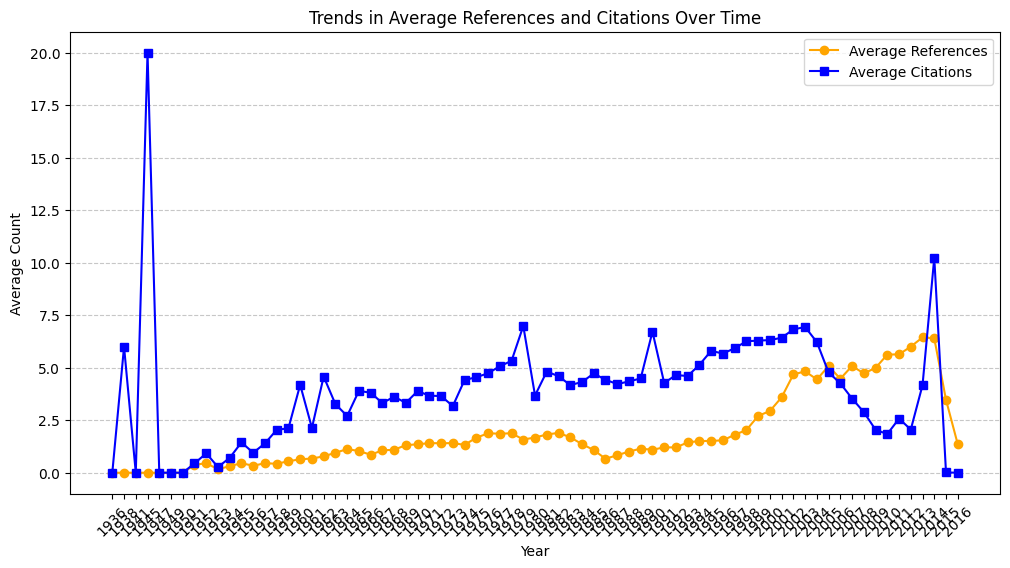

In [152]:
yearly_stats = df.groupby('year').agg(
    avg_references=('num_references', 'mean'),
    avg_citations=('citation_count', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['year'], yearly_stats['avg_references'], label='Average References', marker='o', color='orange')
plt.plot(yearly_stats['year'], yearly_stats['avg_citations'], label='Average Citations', marker='s', color='blue')
plt.title('Trends in Average References and Citations Over Time')
plt.xlabel('Year')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
